# New Product Profitability Prediction
#### Predicting sales of four different product types: PC, Laptops, Netbooks and Smartphones

# Background Info 

The sales team of Blackwell Electronics has consulted with some concerns about ongoing product sales in one of our stores. Specifically, they have been tracking the sales performance of specific product types and would like us to do a sales prediction analysis. They'd like us to include the ‘product type’ attribute in our predictions to better understand how specific product types perform against each other. They have asked our team to analyze historical sales data and then make sales volume predictions for a list of new product types. This will help the sales team better understand how types of products might impact sales across the enterprise.

# Objectives
* Predicting sales of four different product types. 
* Assessing the impact services reviews and customer reviews have on sales of different product types.

# Dataset Info
* We were given two datasets, existing products and new products. 
* Existing_products.cvs file contains product attributes of 80 products. This file will be used for analyzing and training propose.
* New_products.csv file contains 24 new products that we will make the sales volume and profitabiltiy prediction on. 
* Product Attributes' include:
    * Product Type
    * Product Number
    * Price
    * 1-5 Star Reviews
    * Customer Reviews (Positive/Negative)
    * Recommend Product & BestSellers Rank
    * Product Dimensions
    * Profit Margin
    * Sales Volume

# Data Proprocessing
### Dummify the Data
* Most data will contain a mixture of numeric and nominal data so we need to understand how to incorporate both when it comes to developing regression models and making predictions. 
* Categorical variables may be used directly as predictor or predicted variables in a multiple regression model as long as they've been converted to binary values. In order to pre-process the sales data as needed we first need to convert all factor or 'chr' classes to binary features that contain ‘0’ and ‘1’ classes. We will use get_dummies() function from pandas library to achieve this.

### Check for Correlation
* Correlation is a measure of the relationship between two or more features or variables.In this problem, we were tasked with ascertaining if some specific features impact on weekly sales volume. We will use heatmap and correlation matrix to find it out.

### Removing Missing Value
* We use isnull().sum() function to check and count on missing values. Missing data is represented by "NA". There are many methods of addressing missing data, we chose to drop the variable from the analysis because it counts almost 20% of the featured column. 

####  Import Libraries and Upload Dataset

In [2]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import matplotlib as mpl
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Show output of plotting directly below the code 
%matplotlib inline

# Upload Dataset
existing_products = pd.read_csv('existingproductattributes2017.csv')

#### Initial Exploration

In [3]:
# Check the first 5 rows of the data frame
existing_products.head()

,ProductType,ProductNum,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,BestSellersRank,ShippingWeight,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
0,PC,101,949.00,3,3,2,0,0,2,0,0.9,1967.0,25.8,23.94,6.62,16.89,0.15,12
1,PC,102,2249.99,2,1,0,0,0,1,0,0.9,4806.0,50.0,35.00,31.75,19.00,0.25,8
2,PC,103,399.00,3,0,0,0,0,1,0,0.9,12076.0,17.4,10.50,8.30,10.20,0.08,12
3,Laptop,104,409.99,49,19,8,3,9,7,8,0.8,109.0,5.7,15.00,9.90,1.30,0.08,196
4,Laptop,105,1079.99,58,31,11,7,36,7,20,0.7,268.0,7.0,12.90,0.30,8.90,0.09,232


In [4]:
# To check the data type of each variable to make sure all data are numerical
existing_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
ProductType              80 non-null object
ProductNum               80 non-null int64
Price                    80 non-null float64
x5StarReviews            80 non-null int64
x4StarReviews            80 non-null int64
x3StarReviews            80 non-null int64
x2StarReviews            80 non-null int64
x1StarReviews            80 non-null int64
PositiveServiceReview    80 non-null int64
NegativeServiceReview    80 non-null int64
Recommendproduct         80 non-null float64
BestSellersRank          65 non-null float64
ShippingWeight           80 non-null float64
ProductDepth             80 non-null float64
ProductWidth             80 non-null float64
ProductHeight            80 non-null float64
ProfitMargin             80 non-null float64
Volume                   80 non-null int64
dtypes: float64(8), int64(9), object(1)
memory usage: 11.4+ KB


#### Dummify the ProductType Variable
* As we can see the data type for 'ProductType' is object. We need numerical data for all columns. Therefore, we need to convert this category data into dummy variables for algorithm to run properly. 

In [5]:
# Use df.get_dummies() to convert the data type
dummy_products = pd.get_dummies(existing_products['ProductType'])
dummy_products.head()

,Accessories,Display,ExtendedWarranty,GameConsole,Laptop,Netbook,PC,Printer,PrinterSupplies,Smartphone,Software,Tablet
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
# To check the data type of after 'dummyify'
dummy_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
Accessories         80 non-null uint8
Display             80 non-null uint8
ExtendedWarranty    80 non-null uint8
GameConsole         80 non-null uint8
Laptop              80 non-null uint8
Netbook             80 non-null uint8
PC                  80 non-null uint8
Printer             80 non-null uint8
PrinterSupplies     80 non-null uint8
Smartphone          80 non-null uint8
Software            80 non-null uint8
Tablet              80 non-null uint8
dtypes: uint8(12)
memory usage: 1.1 KB


In [7]:
# Concatenate the New 'Dummy Variables' to the Dataframe
existing_products = pd.concat([existing_products, dummy_products], axis=1)

In [8]:
# Delete 'ProductType' Variable
existing_products=existing_products.drop('ProductType', axis=1)

In [9]:
# View the Dataset Columns
existing_products.columns

Index(['ProductNum', 'Price', 'x5StarReviews', 'x4StarReviews',
       'x3StarReviews', 'x2StarReviews', 'x1StarReviews',
       'PositiveServiceReview', 'NegativeServiceReview', 'Recommendproduct',
       'BestSellersRank', 'ShippingWeight', 'ProductDepth', 'ProductWidth',
       'ProductHeight', 'ProfitMargin', 'Volume', 'Accessories', 'Display',
       'ExtendedWarranty', 'GameConsole', 'Laptop', 'Netbook', 'PC', 'Printer',
       'PrinterSupplies', 'Smartphone', 'Software', 'Tablet'],
      dtype='object')

#### Check and Delete Missing Values

In [10]:
# Checking Missing Value
existing_products.isnull().sum()

ProductNum                0
Price                     0
x5StarReviews             0
x4StarReviews             0
x3StarReviews             0
x2StarReviews             0
x1StarReviews             0
PositiveServiceReview     0
NegativeServiceReview     0
Recommendproduct          0
BestSellersRank          15
ShippingWeight            0
ProductDepth              0
ProductWidth              0
ProductHeight             0
ProfitMargin              0
Volume                    0
Accessories               0
Display                   0
ExtendedWarranty          0
GameConsole               0
Laptop                    0
Netbook                   0
PC                        0
Printer                   0
PrinterSupplies           0
Smartphone                0
Software                  0
Tablet                    0
dtype: int64

* The variable 'BestSellerRank' contains 15 out of 80 missing values, which counts for roughly 20% of that column. As we mentioned above, we decide to drop this attribute.

In [11]:
# Delete 'BestSellerRank' Variable
existing_products=existing_products.drop('BestSellersRank', axis=1)

#### Initial Plotting

* As we can see from the above plot, both Positive Service Review and Negative Service Review displayed normal distribution, without any skewed data. However, we could not draw anything by this plot.

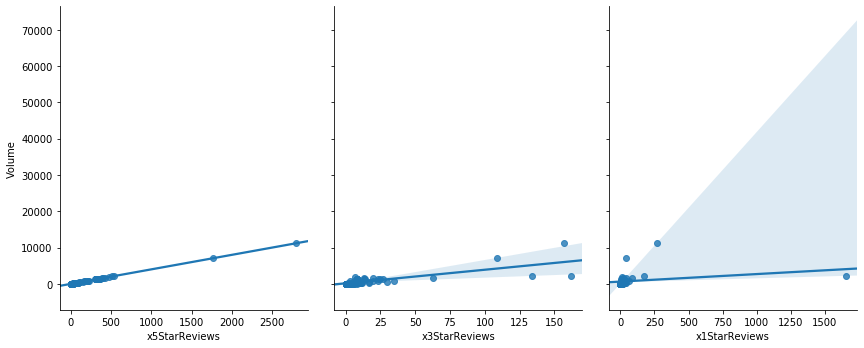

In [12]:
StarReviewPlot = sns.pairplot(x_vars=['x5StarReviews','x3StarReviews','x1StarReviews'], 
                              y_vars='Volume', data=existing_products, height=5, aspect=0.8, kind='reg')

* The first plot with 5 star reviews shows strong positive relationship (positive review increases as the sales volume goes up). 3 star review shows slight positive relationship, and 1 star review does not show any relationships (almost a flat line). Next, let's build a confusion matrix to get a deeper investigation.

#### Correlation Matrix
* is used to find out the collinearity or check for relationships between features. Calculating correlation is a vital part of all Data Science projects and we can achieve it by using pandas df.corr() function.
* Correlation values fall within -1 and 1 with variables have string positive relationships having correlation values closer to 1 and strong negative relationships with values closer to -1.

In [13]:
# Correlation Matrix 
corrMat = existing_products.corr()
print(corrMat)

                       ProductNum     Price  x5StarReviews  x4StarReviews  \
ProductNum               1.000000 -0.039749       0.166121       0.119401   
Price                   -0.039749  1.000000      -0.142344      -0.165284   
x5StarReviews            0.166121 -0.142344       1.000000       0.879006   
x4StarReviews            0.119401 -0.165284       0.879006       1.000000   
x3StarReviews            0.090201 -0.150538       0.763373       0.937214   
x2StarReviews           -0.004533 -0.110681       0.487279       0.679006   
x1StarReviews           -0.063064 -0.083957       0.255024       0.444942   
PositiveServiceReview   -0.057748 -0.142143       0.622260       0.483421   
NegativeServiceReview   -0.019427 -0.060790       0.309419       0.533222   
Recommendproduct         0.003886  0.068930       0.169541       0.071415   
ShippingWeight           0.081239  0.416777      -0.188024      -0.194914   
ProductDepth             0.036188  0.010968       0.066105      -0.031721   

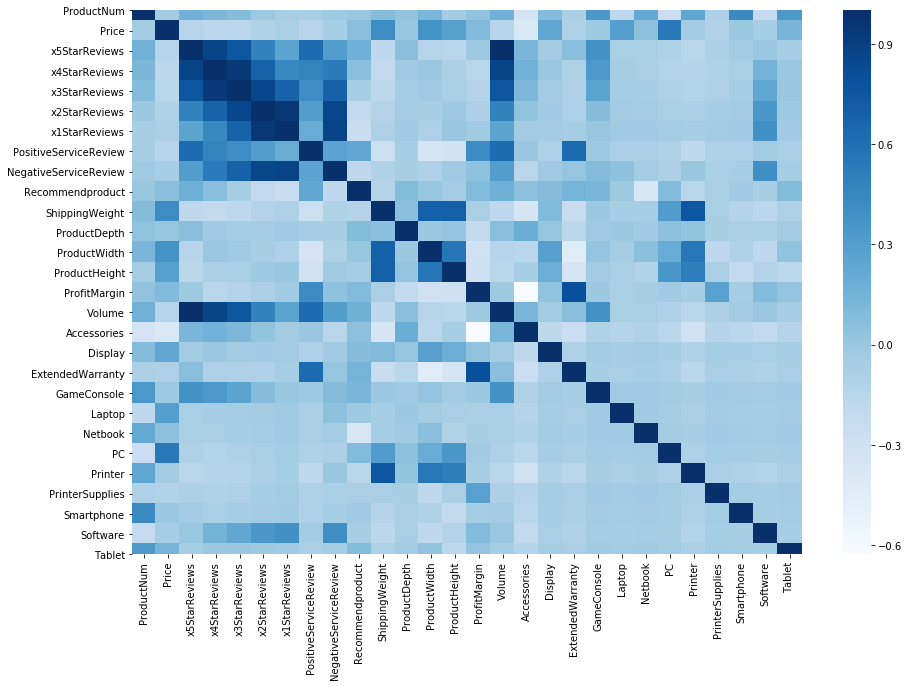

In [14]:
# Create heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corrMat, cmap="Blues")

* When there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest blue means there is a perfect positive correlation, while the lighest blue means there is a perfect negative correlation.
* Correlation matrix revealed 1-5 star reviews, positive and negative reviews has greater relationship with sales volume, product dimensions and profit margin do not have too much relationship. We will take these factors into consideration when we subset dataset for training and testing later on.

#### Checking for Variable Importance
* There are many independent variables. Our goal is to investigate the impact of different reviews on future sales volume. Therefore, we subset the attributes by 1-5 star reviews, positive, negative reviews and volume. We then plot the correlation matrix to find out the importance for these variables. 

In [15]:
# Create a dataframe for Star Reviews and Service Review with respect to Volume
corr_table = corrMat.loc['x5StarReviews':'NegativeServiceReview', ['Volume']]
Ratings=['5 Star','4 Star','3 Star','2 Star','1 Star','Postive','Negative']
corr_table['Ratings']=Ratings
corr_table

,Volume,Ratings
x5StarReviews,1.000000,5 Star
x4StarReviews,0.879006,4 Star
x3StarReviews,0.763373,3 Star
x2StarReviews,0.487279,2 Star
x1StarReviews,0.255024,1 Star
PositiveServiceReview,0.622260,Postive
NegativeServiceReview,0.309419,Negative


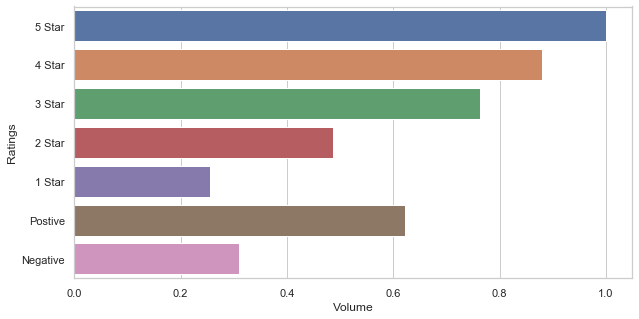

In [16]:
# Create Barplot for Correlatoin Matrix
sns.set(style="whitegrid")
plt.figure(figsize = (10,5))
ax = sns.barplot(x="Volume", y="Ratings", data=corr_table)

* 5 star review has 100% impact on the sales volume, they have a correlation coefficient 1, so it is considered overfitting and should be removed from our dataset. 4 star, 3 star review, and positive review also have significant impact on sales volume. 1 star, 2 star and negative reviews do not have too much impact on the sales volume. It seems customers are more likely driven by the good reviews rather than the bad reviews.

In [22]:
# Use for loop to check and list highly correlated features
highlyCorrelatedFeatures = set()
corr_matrix= existing_products.drop('Volume', axis=1).corr()
        
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.9:
            varName = corr_matrix.columns[i]
            highlyCorrelatedFeatures.add(varName)

highlyCorrelatedFeatures

{'x1StarReviews', 'x3StarReviews'}

#### Create a subset without highly correlated features

In [23]:
# Delete highly correlated features 
existing_products = existing_products.drop(['x1StarReviews', 'x3StarReviews', 'x5StarReviews'], axis=1)

# Check for column names of the updated dataset
existing_products.columns

Index(['ProductNum', 'Price', 'x4StarReviews', 'x2StarReviews',
       'PositiveServiceReview', 'NegativeServiceReview', 'Recommendproduct',
       'ShippingWeight', 'ProductDepth', 'ProductWidth', 'ProductHeight',
       'ProfitMargin', 'Volume', 'Accessories', 'Display', 'ExtendedWarranty',
       'GameConsole', 'Laptop', 'Netbook', 'PC', 'Printer', 'PrinterSupplies',
       'Smartphone', 'Software', 'Tablet'],
      dtype='object')

In [24]:
# Randomly split training and testing datasets by Sci-Kit Learn
from sklearn.model_selection import train_test_split

In [26]:
# Create Training and Testing Sets for cm Dataset
features = existing_products.iloc[:,0:25]
depVar = existing_products['Volume']
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.25, random_state = 123)

In [45]:
# Check the head of independent variables
features.head()

,ProductNum,Price,x4StarReviews,x2StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,ShippingWeight,ProductDepth,ProductWidth,...,ExtendedWarranty,GameConsole,Laptop,Netbook,PC,Printer,PrinterSupplies,Smartphone,Software,Tablet
0,101,949.00,3,0,2,0,0.9,25.8,23.94,6.62,...,0,0,0,0,1,0,0,0,0,0
1,102,2249.99,1,0,1,0,0.9,50.0,35.00,31.75,...,0,0,0,0,1,0,0,0,0,0
2,103,399.00,0,0,1,0,0.9,17.4,10.50,8.30,...,0,0,0,0,1,0,0,0,0,0
3,104,409.99,19,3,7,8,0.8,5.7,15.00,9.90,...,0,0,1,0,0,0,0,0,0,0
4,105,1079.99,31,7,7,20,0.7,7.0,12.90,0.30,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# Check the head of dependent variable 
depVar.head()

0     12
1      8
2     12
3    196
4    232
Name: Volume, dtype: int64

In [47]:
X_train.head()

,ProductNum,Price,x4StarReviews,x2StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,ShippingWeight,ProductDepth,ProductWidth,...,ExtendedWarranty,GameConsole,Laptop,Netbook,PC,Printer,PrinterSupplies,Smartphone,Software,Tablet
1,102,2249.99,1,0,1,0,0.9,50.0,35.0,31.75,...,0,0,0,0,1,0,0,0,0,0
24,125,31.99,31,3,7,0,0.9,0.2,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
65,166,132.36,1,0,0,0,0.8,30.2,20.9,20.90,...,0,0,0,0,0,1,0,0,0,0
45,146,59.99,59,26,60,5,0.8,2.4,7.9,1.40,...,0,0,0,0,0,0,0,0,0,0
60,161,128.49,33,3,5,2,0.9,22.7,15.7,15.90,...,0,0,0,0,0,1,0,0,0,0


In [48]:
y_train.head()

1        8
24     308
65       0
45    1464
60     232
Name: Volume, dtype: int64

In [49]:
X_test.head()

,ProductNum,Price,x4StarReviews,x2StarReviews,PositiveServiceReview,NegativeServiceReview,Recommendproduct,ShippingWeight,ProductDepth,ProductWidth,...,ExtendedWarranty,GameConsole,Laptop,Netbook,PC,Printer,PrinterSupplies,Smartphone,Software,Tablet
64,165,169.26,13,6,4,7,0.5,32.0,15.10,11.70,...,0,0,0,0,0,1,0,0,0,0
58,159,149.99,10,1,4,2,0.8,10.0,20.00,15.30,...,0,0,0,0,0,0,0,0,0,0
59,160,129.99,25,6,4,2,0.9,32.2,15.70,15.90,...,0,0,0,0,0,1,0,0,0,0
4,105,1079.99,31,7,7,20,0.7,7.0,12.90,0.30,...,0,0,1,0,0,0,0,0,0,0
69,177,379.99,0,1,0,1,0.3,3.0,7.44,10.43,...,0,0,0,1,0,0,0,0,0,0


In [50]:
y_test.head()

64     80
58     84
59    296
4     232
69      4
Name: Volume, dtype: int64

In [27]:
# Use the shape function to double check if the split was made as desired
X_train.shape, X_test.shape

((60, 25), (20, 25))

# Building Models
* Here we use three regression algorithms:  
 * Random Forest
 * Supportive Vector Machine (SVM) 
 * Gradient Boosting

In [28]:
# Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [29]:
import warnings
warnings.filterwarnings("ignore")

#### Use cross_val_score to compare the performance on 3 models
* Random Forest Model

In [31]:
# Define the Regressor
modelRF = RandomForestRegressor(n_estimators=15)

# Fit the Model
modelRF.fit(X_train, y_train)
print(cross_val_score(modelRF, X_train, y_train))

[0.89364798 0.95526628 0.2103719 ]


* SVM Model

In [32]:
# Define the Regressor
modelSVM = SVR(kernel='linear')

# Fit the Model
modelSVM.fit(X_train, y_train)
print(cross_val_score(modelSVM, X_train, y_train))

[0.99999997 0.99999998 0.99999997]


##### With R-square value almost 1, this model is overfitting.

* Gradient Boosting Model

In [35]:
# Define the Regressor
modelGB = GradientBoostingRegressor(n_estimators=15)

# Fit the Model
modelGB.fit(X_train, y_train)
print(cross_val_score(modelGB, X_train, y_train))

[0.85002683 0.91015475 0.18522637]


#### R Square, RMSE and Model Score for Each Model

In [78]:
# Make Predictions
Pred = modelRF.predict(X_test)
Rsquared = r2_score(y_test, Pred)
RMSE = sqrt(mean_squared_error(y_test, Pred))
print('R Squared: %.3f' % Rsquared)
print('RMSE: %.3f' % RMSE)

R Squared: 0.846
RMSE: 605.227


In [55]:
modelRF.score(X_train, y_train)

0.9512884837132101

In [56]:
# Make Predictions
Pred_GB = modelGB.predict(X_test)
Rsquared = r2_score(y_test, Pred)
RMSE = sqrt(mean_squared_error(y_test, Pred))
print('R Squared: %.3f' % Rsquared)
print('RMSE: %.3f' % RMSE)

R Squared: 0.763
RMSE: 750.546


In [57]:
modelGB.score(X_train, y_train)

0.9561743276577171

In [86]:
# Make Predictions
Pred_SVM = modelSVM.predict(X_test)
Rsquared = r2_score(y_test, Pred)
RMSE = sqrt(mean_squared_error(y_test, Pred))
print('R Squared: %.3f' % Rsquared)
print('RMSE: %.3f' % RMSE)

R Squared: 0.846
RMSE: 605.227


In [59]:
modelSVM.score(X_train, y_train)

0.9999999974635441

### Model Selection
#### We will use R-Squared, RMSE and Model Score to evaluate these models
* <b>R-squared measures</b> the percentage of the variance between the dependent variable that is predicted from the independent variables and the observed dependent variable.

* <b>RMSE</b>(Root Mean Squared Error) measures teh error between predicted and observed values. In other words, how close the real data are fitted to teh prediction

SVM Model is for sure overfitting, as both of the model score and cross_val_score is almost 1. Therefore, we will drop this model from further consideration.

We picked Random Forest model because it has the higher RMSE, RSquared and cross_val_score than the corresponding values in Gradient Boosting model.

## Make Predictions on the New Products

#### Load new product dataset and perform necessary preprocessing

In [153]:
new_products = pd.read_csv('newproductattributes2017.csv')

In [154]:
# Use df.get_dummies() to convert the data type
dummy_new = pd.get_dummies(new_products['ProductType'])

# Concatenate Dummy Variables with the original Dataframe
new_products = pd.concat([new_products, dummy_new], axis=1)

# Delete 'ProductType' and 'BestSellersRank' Variables
new_products=new_products.drop('ProductType', axis=1)
new_products=new_products.drop('BestSellersRank', axis=1)

# Delete other highly correlated variables mannually

new_manual = new_products.drop(['x1StarReviews', 'x3StarReviews', 'x5StarReviews'], axis=1)

# Check for column names of the updated dataset
new_manual.columns

Index(['ProductNum', 'Price', 'x4StarReviews', 'x2StarReviews',
       'PositiveServiceReview', 'NegativeServiceReview', 'Recommendproduct',
       'ShippingWeight', 'ProductDepth', 'ProductWidth', 'ProductHeight',
       'ProfitMargin', 'Volume', 'Accessories', 'Display', 'ExtendedWarranty',
       'GameConsole', 'Laptop', 'Netbook', 'PC', 'Printer', 'PrinterSupplies',
       'Smartphone', 'Software', 'Tablet'],
      dtype='object')

#### Make Predictions using Random Forest Model

In [155]:
# Take out dependent variable
feature_new = new_manual.iloc[:, 0:25]
 
# Make Predictions
newPred = modelRF.predict(feature_new)

In [157]:
# Need to reload the newproduct dataset for profitbility calculatoin 
new_products = pd.read_csv('newproductattributes2017.csv')

#### Create a final output with product type and profit

In [158]:
# Add volume and create profit variable
profit = new_products
profit['Volume'] = newPred
profit['Profit'] = profit['Volume'] * profit['Price'] * profit['ProfitMargin']

# Create a dataset with product type and profit 
profit = profit[['ProductType','Profit']]

## Final Analysis and Visualization
### Profit by Product Type

In [161]:
profit.groupby('ProductType').sum().loc[['PC','Laptop','Netbook','Smartphone']]

,Profit
ProductType,
PC,26778.933333
Laptop,15313.373333
Netbook,6441.416640
Smartphone,3909.976000


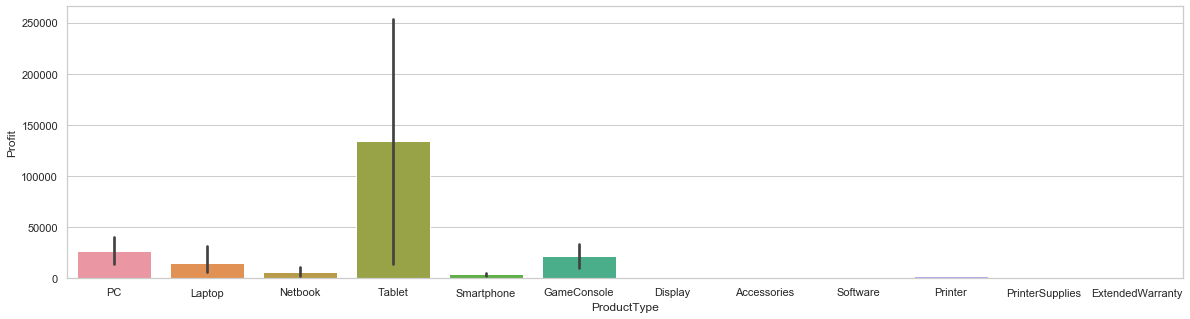

In [163]:
plt.figure(figsize = (20,5))
sns.barplot(data=profit,  x='ProductType', y='Profit', estimator=sum)

* We were asked to predict the profitability of PC, Laptop, Notebook and Smartphone. PC shows the highest profit among the four. But from the plot below, we can see Tablets and GameConsole actually have the highest profit among all the products. We should focus more on these two products.

### Summary on Reviews

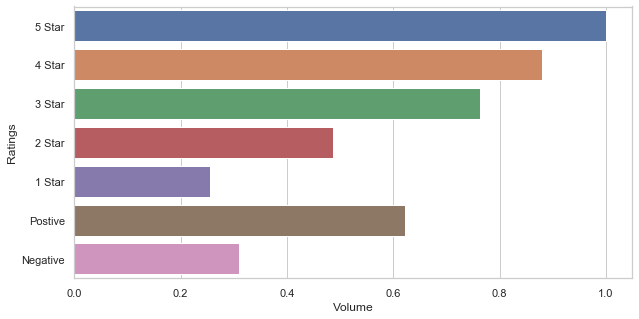

In [165]:
# Create Barplot for Correlatoin Matrix
sns.set(style="whitegrid")
plt.figure(figsize = (10,5))
ax = sns.barplot(x="Volume", y="Ratings", data=corr_table)

* 5 star review has 100% impact on the sales volume. 4 star, 3 star review, and positive review also have significant impact on sales volume. 1 star, 2 star and negative reviews do not have too much impact on the sales volume. It seems customers are more likely driven by the good reviews rather than the bad reviews.

<b>Here ends our project</b>